In [ ]:
#!pip3 install keras
#!pip3 install tensorflow

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
data = pd.read_pickle("./entrenamiento.pkl")

In [3]:
data

,0,1,filename,array,persona
0,1,0,65_02_01.png,"[[34, 43, 40, 31, 35, 43, 26, 25, 19, 19, 20, ...",0
1,1,0,101_03_01.png,"[[86, 107, 108, 108, 108, 107, 107, 108, 108, ...",0
2,1,0,209_02_02.png,"[[84, 84, 85, 85, 95, 84, 83, 85, 87, 93, 90, ...",0
3,1,0,227_03_03.png,"[[91, 100, 100, 101, 102, 102, 99, 105, 99, 96...",0
4,1,0,337_03_01.png,"[[15, 59, 121, 124, 124, 120, 88, 88, 95, 99, ...",0
...,...,...,...,...,...
5168,0,1,414_02_02.png,"[[175, 176, 178, 180, 182, 184, 186, 189, 192,...",1
5169,0,1,357_01_02.png,"[[98, 98, 99, 99, 99, 96, 90, 83, 76, 71, 70, ...",1
5170,0,1,287_02_02.png,"[[32, 32, 33, 33, 34, 35, 36, 37, 37, 37, 37, ...",1
5171,0,1,22_02_01.png,"[[64, 63, 60, 58, 57, 55, 53, 50, 47, 46, 46, ...",1


In [4]:
data.columns

Index([0, 1, 'filename', 'array', 'persona'], dtype='object')

In [5]:
img_rows, img_cols, img_channels = 128, 128, 1

In [6]:
data['array'][0].shape

(128, 128)

In [7]:
X = np.stack(data['array'])
X = X / 255

In [8]:
y = np.column_stack((data[0], data[1]))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
input_shape = (img_rows, img_cols, img_channels)
num_classes = 2

In [11]:
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4138, 128, 128, 1) (1035, 128, 128, 1) (4138, 2) (1035, 2)


In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [14]:
batch_size = 20
epochs = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 4138 samples, validate on 1035 samples
Epoch 1/10
4138/4138 [==============================] - 188s 45ms/step - loss: 0.4986 - accuracy: 0.7811 - val_loss: 0.2642 - val_accuracy: 0.8966
Epoch 2/10
4138/4138 [==============================] - 188s 45ms/step - loss: 0.1661 - accuracy: 0.9466 - val_loss: 1.0038 - val_accuracy: 0.7121
Epoch 3/10
4138/4138 [==============================] - 189s 46ms/step - loss: 0.1027 - accuracy: 0.9698 - val_loss: 0.0608 - val_accuracy: 0.9845
Epoch 4/10
4138/4138 [==============================] - 190s 46ms/step - loss: 0.0627 - accuracy: 0.9802 - val_loss: 0.0341 - val_accuracy: 0.9913
Epoch 5/10
4138/4138 [==============================] - 191s 46ms/step - loss: 0.0338 - accuracy: 0.9908 - val_loss: 0.0178 - val_accuracy: 0.9923
Epoch 6/10
4138/4138 [==============================] - 193s 47ms/step - loss: 0.0265 - accuracy: 0.9935 - val_loss: 0.0358 - val_accuracy: 0.9865
Epoch 7/10
4138/4138 [==============================] - 192s 46ms/step

In [ ]:
import time 
moment=time.localtime()
name='Model_{}_{}-{}-{}.h5'.format(model.history.history["val_accuracy"][-1],moment[2],moment[3],moment[4])
model.save(name)

In [ ]:
import json
model_json = model.to_json()
with open(name+'.json', "w") as json_file:
    json.dump(model_json, json_file)
model.save_weights(name)

Probs -> No:0.00067 Yes:0.99933


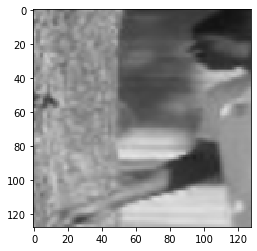

In [18]:
# Prueba con 1
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = X_test[343]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print("Probs -> No:{0:.5f} Yes:{1:.5f}".format(pred[0],pred[1]))
plt.imshow(Image.fromarray(img.squeeze()*255),'gray')

[6.725986e-04 9.993274e-01]
[1.000000e+00 7.026429e-11]


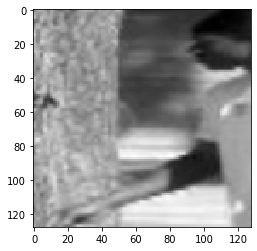

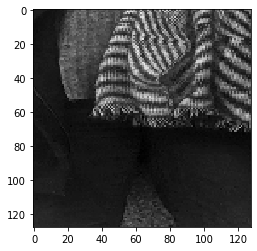

In [60]:
img = np.expand_dims(X_test[343], axis=0)
img2 = np.expand_dims(np.expand_dims(cv2.resize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY),(128,128)),axis=0),axis=3)/255
plt.figure()
plt.imshow(img[0,:,:,0],cmap="gray")
plt.figure()
plt.imshow(img2[0,:,:,0],cmap="gray")
print(model.predict(img)[0])
print(model.predict(img2)[0])


In [ ]:
# Check to see how X_test performed. Display it in a dataframe that compares predictions with ground truth
def predictOne(img):
    return model.predict(np.expand_dims(img,axis=0))[0]
    
pred_0 = []
pred_1 = []
for img in X_test:
    pred_0.append(int(round(predictOne(img)[0],0)))
    pred_1.append(int(round(predictOne(img)[1],0)))

prueba = pd.DataFrame(y_test.copy())

prueba['pred_0'] = pred_0
prueba['pred_1'] = pred_1
prueba

In [ ]:
prueba[prueba[0]!=prueba['pred_0']]

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


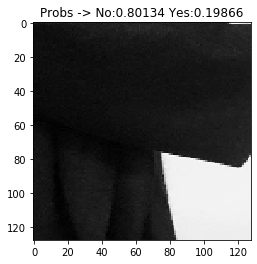

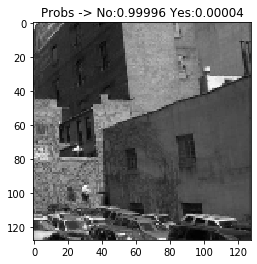

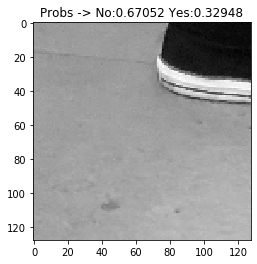

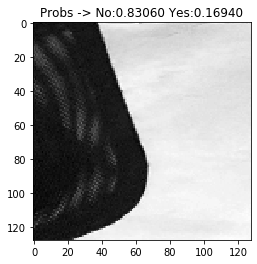

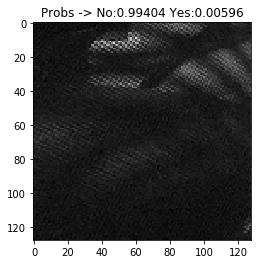

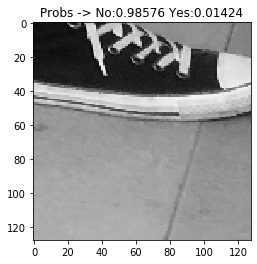

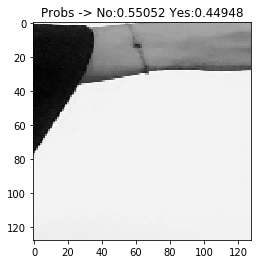

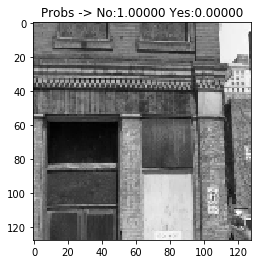

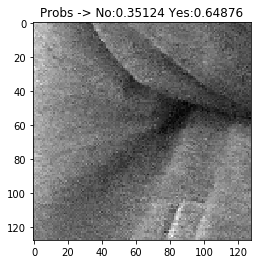

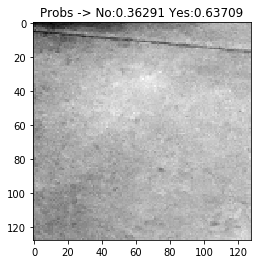

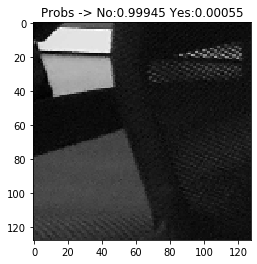

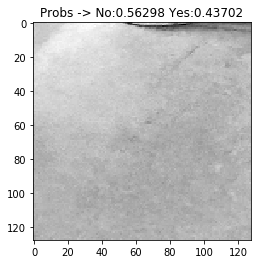

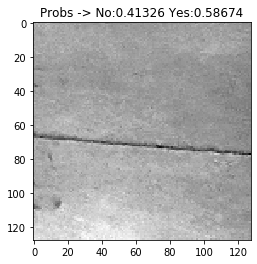

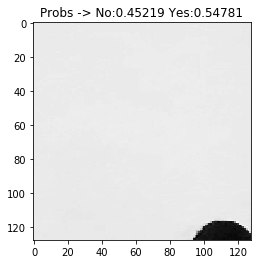

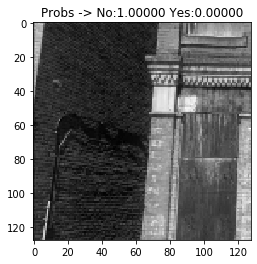

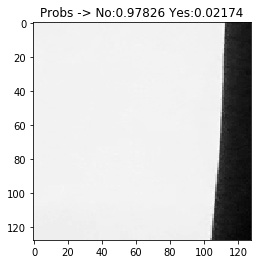

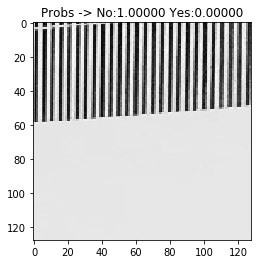

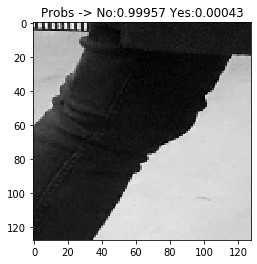

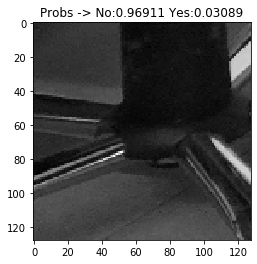

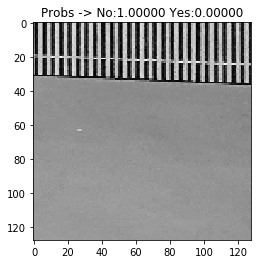

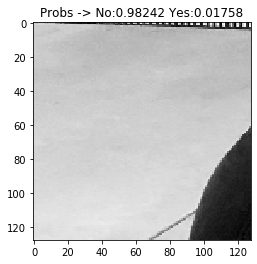

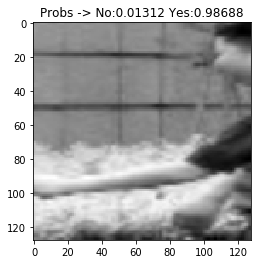

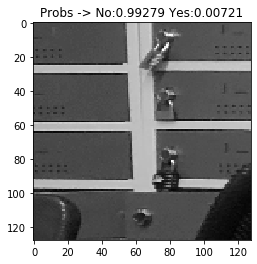

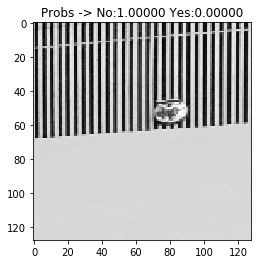

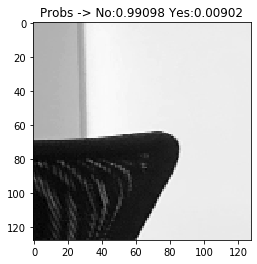

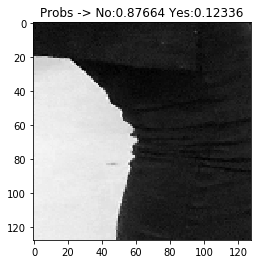

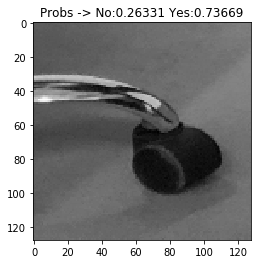

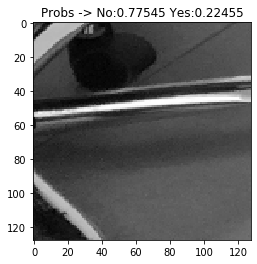

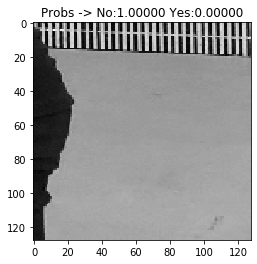

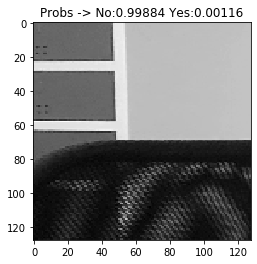

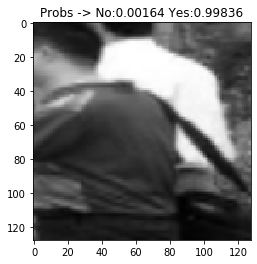

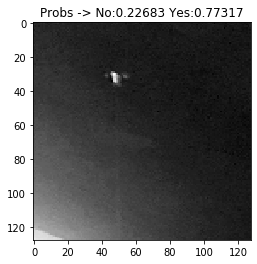

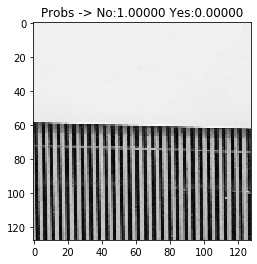

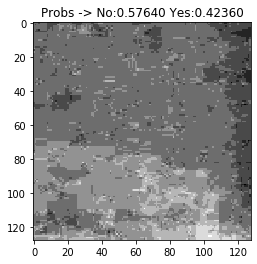

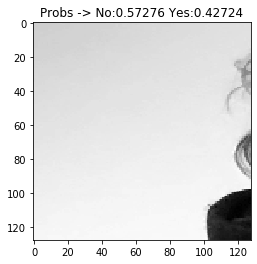

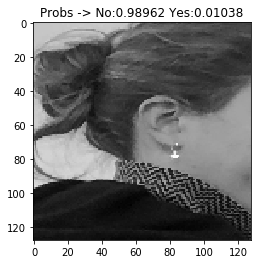

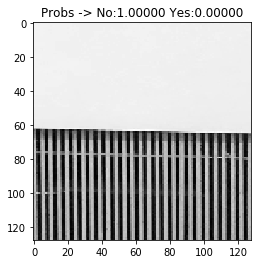

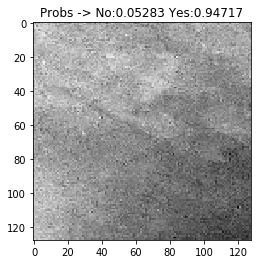

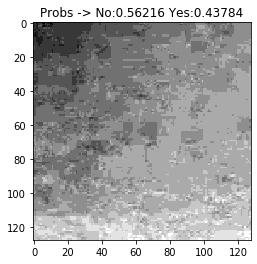

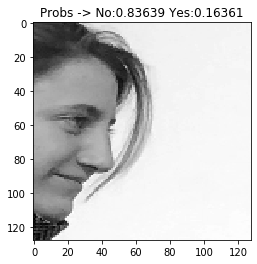

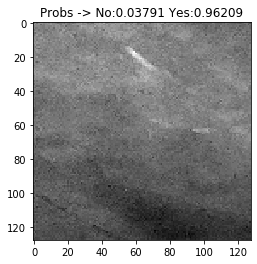

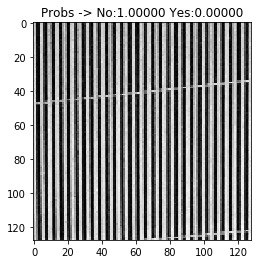

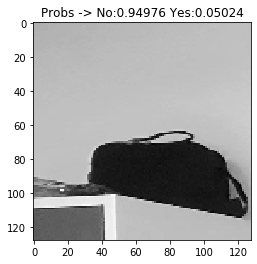

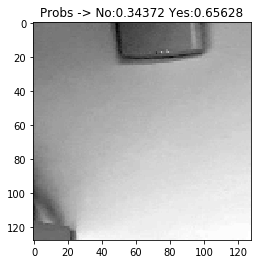

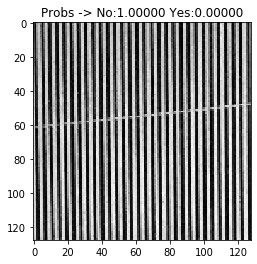

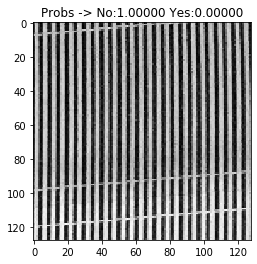

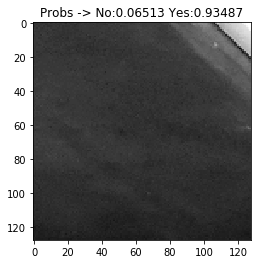

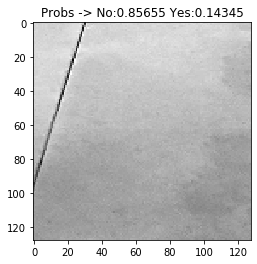

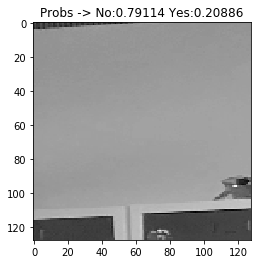

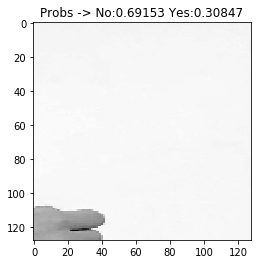

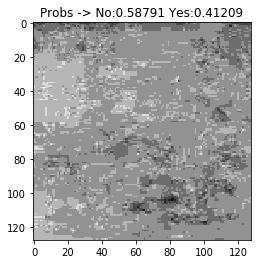

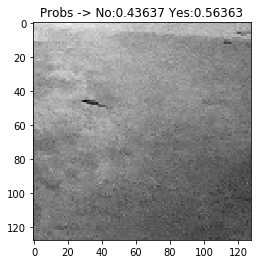

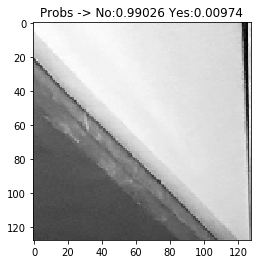

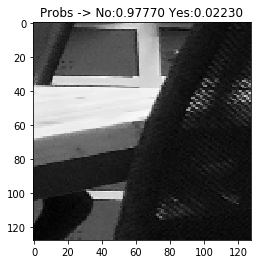

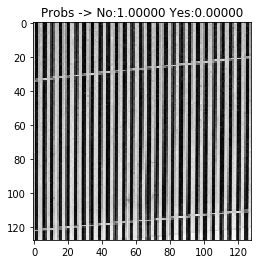

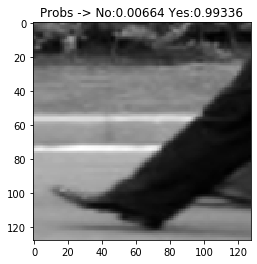

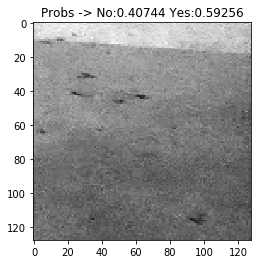

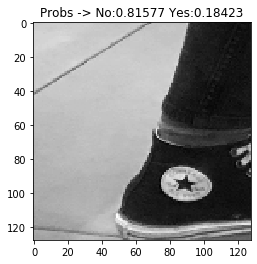

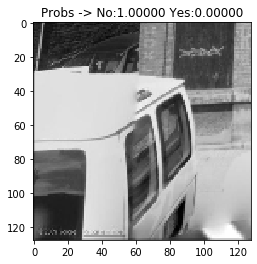

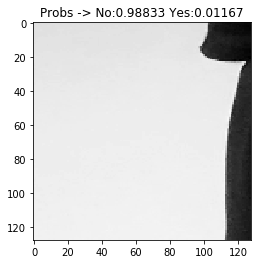

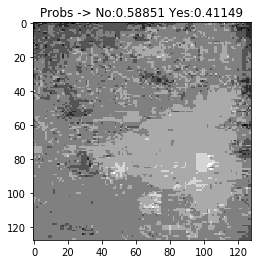

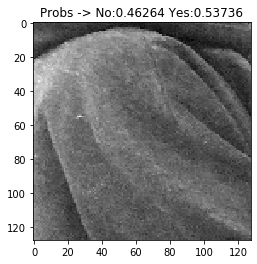

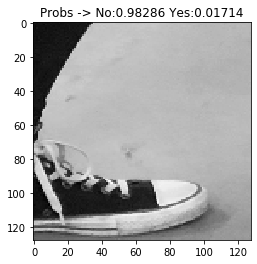

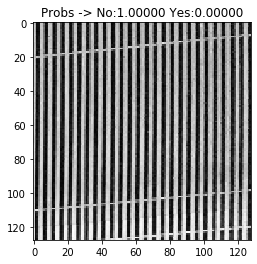

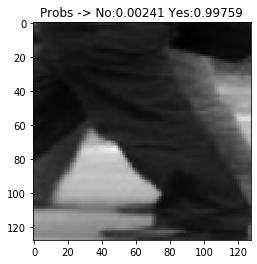

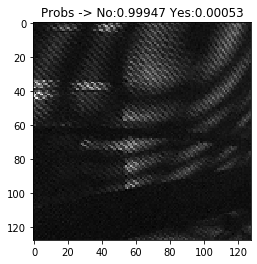

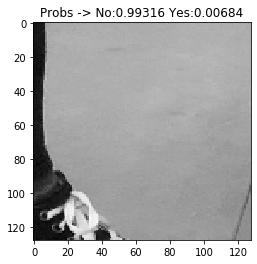

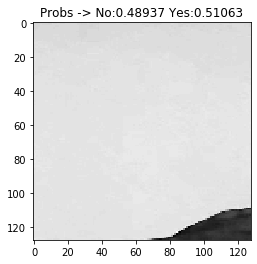

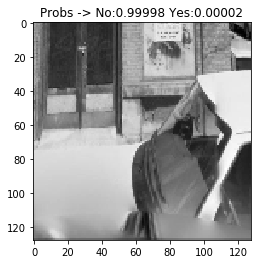

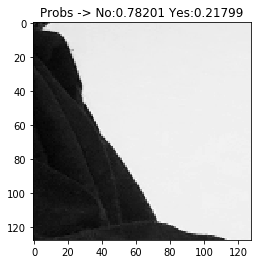

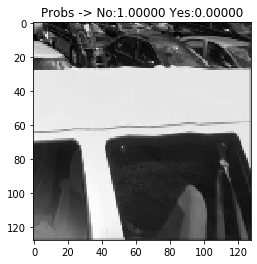

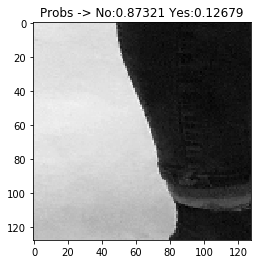

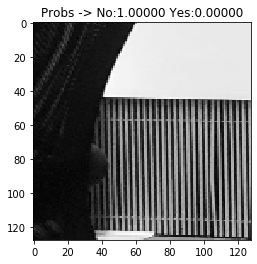

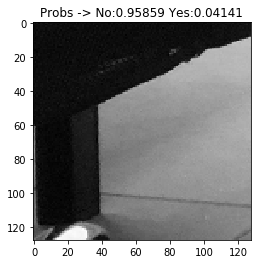

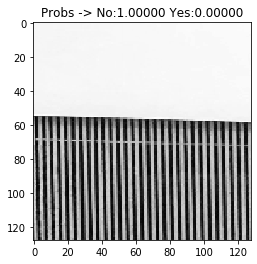

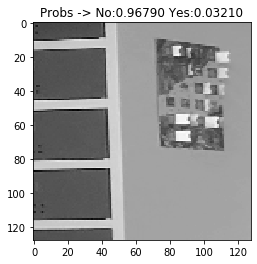

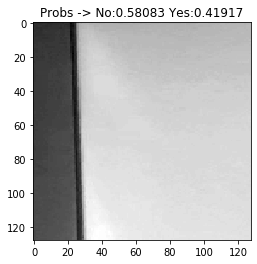

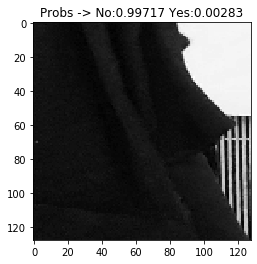

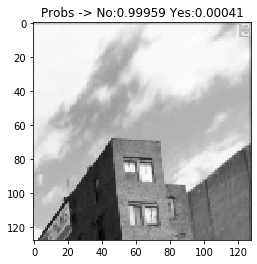

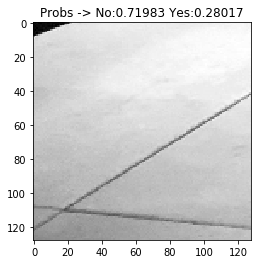

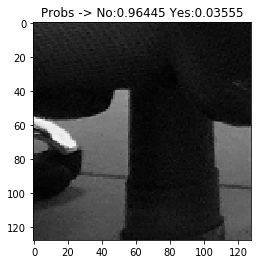

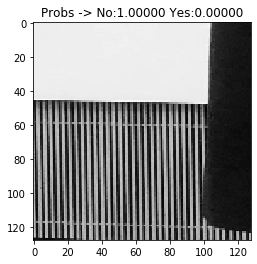

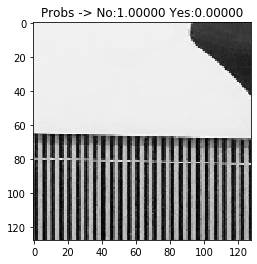

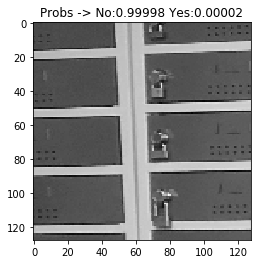

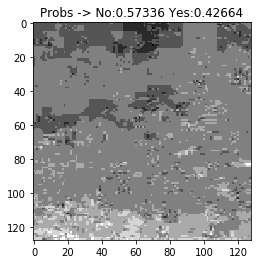

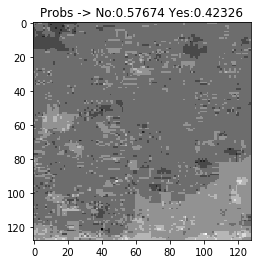

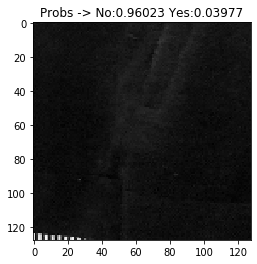

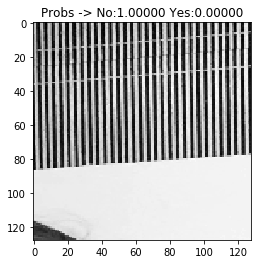

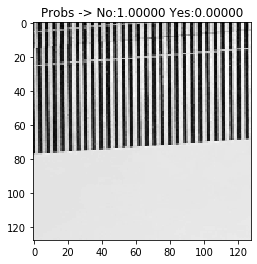

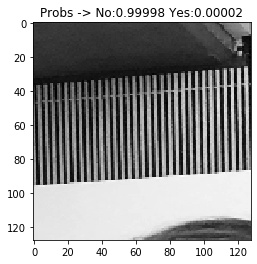

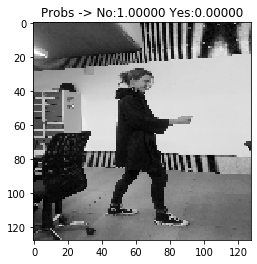

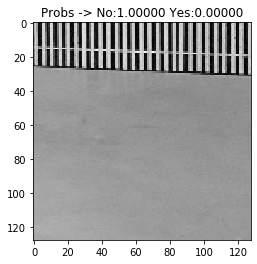

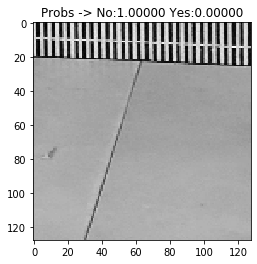

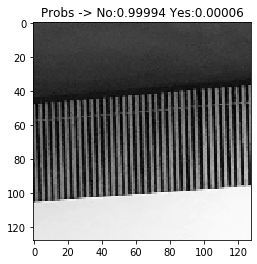

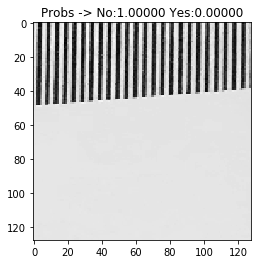

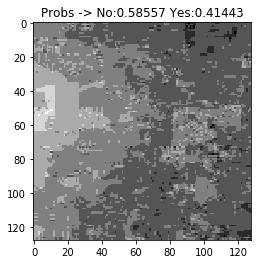

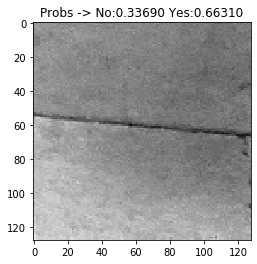

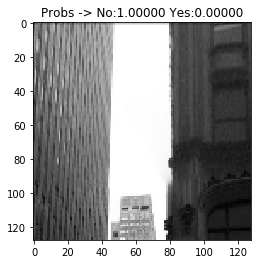

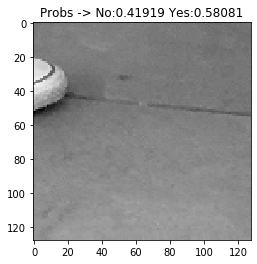

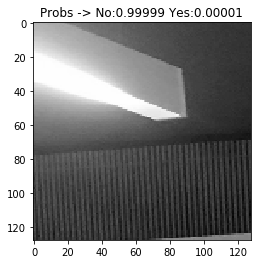

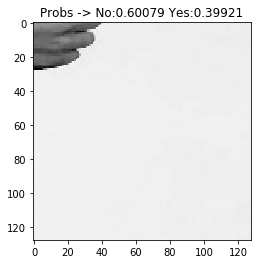

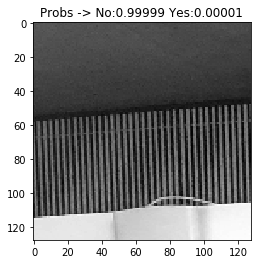

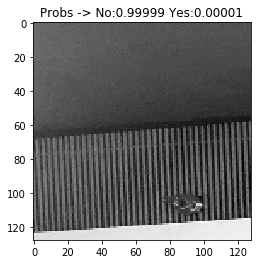

In [74]:
import cv2
import matplotlib.pyplot as plt
import glob
import os

def predictPersona(im):
    im = im / 255
    prepared_data = np.expand_dims(np.expand_dims(im,axis=3),axis=0)
    preds = model.predict(prepared_data)
    pred = preds[0]
    return "Probs -> No:{0:.5f} Yes:{1:.5f}".format(pred[0],pred[1])

path = "./Imagenes/yo_recortada"

files = glob.glob('{}/*.png'.format(path))
for file in files:
    im = cv2.resize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY),(128,128))
    plt.figure()
    plt.imshow(im,cmap="gray")
    answer= predictPersona(im)
    plt.title(f"{answer}")

# SLIDING WINDOW

In [ ]:
from ipynb.fs.defs.Fotos import loadImageAsGray

In [ ]:
img = loadImageAsGray("./Imagenes/PennFudanPed/PNGImages/FudanPed00001.png")
img = img / 255
x , y = img.shape
print(x)
print(y)

stop_x = x
stop_y = y

def getWindow(x,y,size=128,step=64):
    ventanas = []
    for j in range(0,x-step,step):
        if j+size > x:
            j=x-size
        for i in range(0,y-step,step):
            if i+size > y:
                i=y-size
            window = {
                'xmin': j,
                'xmax': j+size,
                'ymin': i,
                'ymax': i+size
            }
            yield window

In [66]:
with open('Model_0.991304337978363_16-15-46.h5.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('Model_0.991304337978363_16-15-46.h5')

In [ ]:
def applyModel(x,y,size=128,step=64):
    for i in getWindow(x,y,size,step):
        crop =img[i['xmin']:i['xmax'], i['ymin']:i['ymax']]
        plt.imshow(crop)
        #print(crop)
        #print(crop.shape)
        
        prepared_data = np.expand_dims(np.expand_dims(crop,axis=3),axis=0)
        pred = model.predict(prepared_data)[0]
        
        print(i)
        print("Probs -> No:{0:.5f} Yes:{1:.5f}".format(pred[0],pred[1]))

    return 'NO' if pred[0]>pred[1] else 'YES'
    
    
applyModel(x,y,size=128,step=64)

In [ ]:
i={'xmin': 128, 'xmax': 256, 'ymin': 320, 'ymax': 448}
crop =img[i['xmin']:i['xmax'],i['ymin']:i['ymax']]
plt.imshow(crop)
#print(crop)
#print(crop.shape)

crop = crop.reshape(1, img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

pred = model.predict(crop)[0]
print(i)
print("Probs -> No:{0:.5f} Yes:{1:.5f}".format(pred[0],pred[1]))
